# Исследование датасета с волнами реновации в Москве.
Программа реновации запущена Правительством Москвы в 2017 году. Благодаря ей 350 тысяч московских семей, то есть более миллиона человек, переедут в новые квартиры в центре города в комфортной транспортной доступности.
Какие дома войдут в программу, решают сами жильцы. По результатам голосования в программу реновации Москвы включено 5174 дома.
Вместо квартир в ветхих домах участники программы получат жилье в новых монолитно-панельных домах в своем районе. Согласно распоряжению правительства Москвы, вся программа переселения должна быть завершена к 2032 году и должна будет проходить в три этапа (три волны):
первый этап 2020-2024 годы, в него включено 930 домов;
второй этап 2025-2028 гг., в него включено 1636 домов;
третья очередь 2029-2032 гг., в нее включено 1809 домов;
без конкретной очереди (этапы должны быть определены до конца 1 квартала 2021 года) - 688 домов.
Этот набор данных является зеркалом исходных данных из приказа Правительства Москвы № 45/182/ПР-335/20 от 12.08.2020.

In [1]:
# Импортируем библиотеки:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Сохраним в переменную датафрейм из файла Excel:

data = pd.read_excel('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-kirilovichev/waves_of_renovation.xlsx')
data.head(10)

,Unnamed: 0,city_area,disctrict,house_address,unom,wave,period
0,0,ЦАО,Басманный,"Бакунинская ул., д.49 c.4",1316,1,2020-2024 г.
1,1,ЦАО,Басманный,"Бакунинская ул., д.77 c.3",1327,1,2020-2024 г.
2,2,ЦАО,Басманный,"Балакиревский пер., д.2/26",19328,1,2020-2024 г.
3,3,ЦАО,Басманный,"Госпитальный Вал ул., д.3",31354,1,2020-2024 г.
4,4,ЦАО,Басманный,"Госпитальный Вал ул., д.3 к.1",5856,1,2020-2024 г.
5,5,ЦАО,Басманный,"Госпитальный Вал ул., д.5 к.10",5873,1,2020-2024 г.
6,6,ЦАО,Басманный,"Почтовая Б. ул., д.51-53 c.1",20707,1,2020-2024 г.
7,7,ЦАО,Басманный,"Почтовая Б. ул., д.61-67 c.1",20708,1,2020-2024 г.
8,8,ЦАО,Красносельский,"Гаврикова ул., д.3/1",22182,1,2020-2024 г.
9,9,ЦАО,Красносельский,"Леснорядская 2-я ул., д.10-12 c.1",13074,1,2020-2024 г.


<span style="color:blue">Данные импортированы.</span>

In [3]:
# Удалим лишний столбец "Unnamed: 0":

del data['Unnamed: 0']
data.head(10)

,city_area,disctrict,house_address,unom,wave,period
0,ЦАО,Басманный,"Бакунинская ул., д.49 c.4",1316,1,2020-2024 г.
1,ЦАО,Басманный,"Бакунинская ул., д.77 c.3",1327,1,2020-2024 г.
2,ЦАО,Басманный,"Балакиревский пер., д.2/26",19328,1,2020-2024 г.
3,ЦАО,Басманный,"Госпитальный Вал ул., д.3",31354,1,2020-2024 г.
4,ЦАО,Басманный,"Госпитальный Вал ул., д.3 к.1",5856,1,2020-2024 г.
5,ЦАО,Басманный,"Госпитальный Вал ул., д.5 к.10",5873,1,2020-2024 г.
6,ЦАО,Басманный,"Почтовая Б. ул., д.51-53 c.1",20707,1,2020-2024 г.
7,ЦАО,Басманный,"Почтовая Б. ул., д.61-67 c.1",20708,1,2020-2024 г.
8,ЦАО,Красносельский,"Гаврикова ул., д.3/1",22182,1,2020-2024 г.
9,ЦАО,Красносельский,"Леснорядская 2-я ул., д.10-12 c.1",13074,1,2020-2024 г.


<span style="color:blue">Лишний столбец удален.</span>

In [4]:
# Переименуем столбцы:

data = data.rename(columns={'disctrict':'district', 'unom': 'house_id'})
data.head(10)

,city_area,district,house_address,house_id,wave,period
0,ЦАО,Басманный,"Бакунинская ул., д.49 c.4",1316,1,2020-2024 г.
1,ЦАО,Басманный,"Бакунинская ул., д.77 c.3",1327,1,2020-2024 г.
2,ЦАО,Басманный,"Балакиревский пер., д.2/26",19328,1,2020-2024 г.
3,ЦАО,Басманный,"Госпитальный Вал ул., д.3",31354,1,2020-2024 г.
4,ЦАО,Басманный,"Госпитальный Вал ул., д.3 к.1",5856,1,2020-2024 г.
5,ЦАО,Басманный,"Госпитальный Вал ул., д.5 к.10",5873,1,2020-2024 г.
6,ЦАО,Басманный,"Почтовая Б. ул., д.51-53 c.1",20707,1,2020-2024 г.
7,ЦАО,Басманный,"Почтовая Б. ул., д.61-67 c.1",20708,1,2020-2024 г.
8,ЦАО,Красносельский,"Гаврикова ул., д.3/1",22182,1,2020-2024 г.
9,ЦАО,Красносельский,"Леснорядская 2-я ул., д.10-12 c.1",13074,1,2020-2024 г.


<span style="color:blue">Столбцы переименованы.</span>

In [5]:
# Изучим получившийся датафрейм:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city_area      5063 non-null   object
 1   district       5063 non-null   object
 2   house_address  4793 non-null   object
 3   house_id       5063 non-null   int64 
 4   wave           5063 non-null   int64 
 5   period         5063 non-null   object
dtypes: int64(2), object(4)
memory usage: 237.5+ KB


<span style="color:blue">Всего в датафрейме 5063 строк.</span>

In [6]:
# Проверим пропуски:

data.isnull().sum()

city_area          0
district           0
house_address    270
house_id           0
wave               0
period             0
dtype: int64

<span style="color:blue">Присутствует 270 пропусков в столбце с адресом дома. Целесообразно целиком удалить эти строки.</span>

In [7]:
# Удалим пропуски:

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4963
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city_area      4793 non-null   object
 1   district       4793 non-null   object
 2   house_address  4793 non-null   object
 3   house_id       4793 non-null   int64 
 4   wave           4793 non-null   int64 
 5   period         4793 non-null   object
dtypes: int64(2), object(4)
memory usage: 262.1+ KB


<span style="color:blue">Строки с пропусками удалены. В датафрейме осталось 4793 записей, на 270 меньше, чем было.</span>

In [8]:
# Проверим дубликаты:

data.duplicated().sum()

0

<span style="color:blue">Дубликаты отсутствуют.</span>

In [9]:
# Создадим переменные для группировки количества домов по различным параметрам:

# группировка по волнам реновации:
groupby_period = (data
    .groupby('period', as_index = False)[['house_id']]
    .count().sort_values(by = 'period', ascending = True)
    .reset_index(drop = True)
    .rename(columns={'house_id':'houses_cnt'})
               )

# группировка по округам:
groupby_city_area = (data
    .groupby('city_area', as_index = False)[['house_id']]
    .count().sort_values(by = 'house_id', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'house_id':'houses_cnt'})
               )

# группировка по топ-10 районов:
groupby_district = (data
    .groupby('district', as_index = False)[['house_id']]
    .count().sort_values(by = 'house_id', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'house_id':'houses_cnt'})
    [:10]
               )

# группировка по топ-10 улиц:
data['street'] = data['house_address'].str.split(',').str[0]
data.head()
groupby_street = (data
    .groupby('street', as_index = False)[['house_id']]
    .count().sort_values(by = 'house_id', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'house_id':'houses_cnt'})
    [:10]
               )

<span style="color:blue">Переменные для построяния графиков созданы.</span>

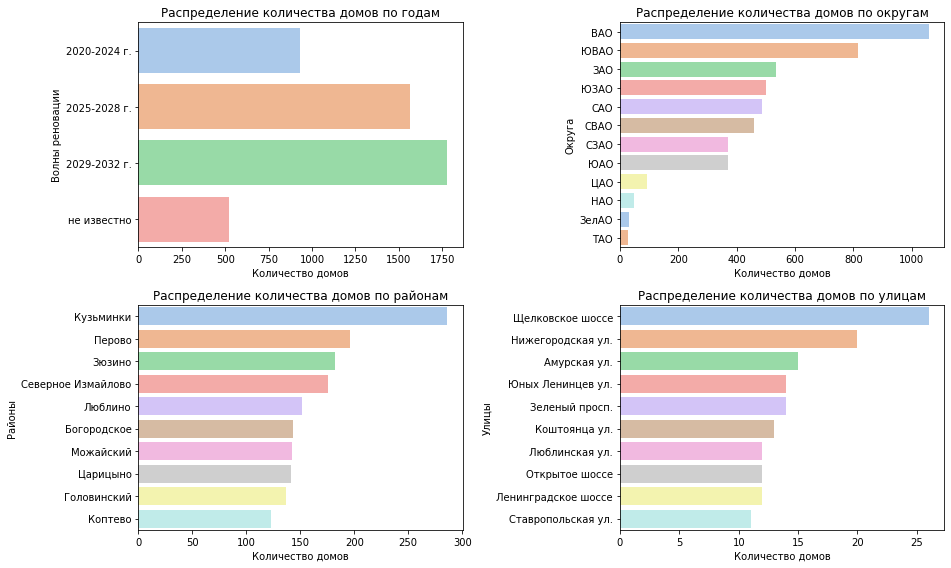

In [10]:
# Построим графики:

plt.figure(figsize=(20, 8))
    
ax1 = plt.subplot(2, 3, 1)
sns.barplot(x='houses_cnt', y='period', data=groupby_period, palette = sns.color_palette('pastel'), ax = ax1)
plt.title('Распределение количества домов по годам')
plt.xlabel('Количество домов')
plt.ylabel('Волны реновации')

ax2 = plt.subplot(2, 3, 2)
sns.barplot(x='houses_cnt', y='city_area', data=groupby_city_area, palette = sns.color_palette('pastel'), ax = ax2)
plt.title('Распределение количества домов по округам')
plt.xlabel('Количество домов')
plt.ylabel('Округа')

ax3 = plt.subplot(2, 3, 4)
sns.barplot(x='houses_cnt', y='district', data=groupby_district, palette = sns.color_palette('pastel'), ax = ax3)
plt.title('Распределение количества домов по районам')
plt.xlabel('Количество домов')
plt.ylabel('Районы')

ax4 = plt.subplot(2, 3, 5)
sns.barplot(x='houses_cnt', y='street', data=groupby_street, palette = sns.color_palette('pastel'), ax = ax4)
plt.title('Распределение количества домов по улицам')
plt.xlabel('Количество домов')
plt.ylabel('Улицы')

plt.tight_layout()
plt.show()

<span style="color:blue">
Графики построены. Можно сделать следующие выводы:
    
- больше всего домов будет построено в третью волну реновации с 2029 по 2032 года;
- больше всего домов подлежит реновации в Восточном и Юго-восточном административных округах, меньше всего - в Троицком административном округе;
- больше всего домов будет реновировано в районе Кузьминки;
- по количеству реновируемых домов в Москве лидируют Щелковское шоссе и Нижегородская улица.
</span>